In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

In [2]:
news = pd.read_csv('Sample data/train/news.tsv',sep='\t',header=None, index_col=0)
news.columns = ["Category", "SubCategory", "Title", "Abstract", "URL", "Entities", "RelatedEntities"]
news.drop(columns=["URL", "Entities", "RelatedEntities"], inplace=True)

In [ ]:
text_data = news['Title']
word_counts = text_data.apply(lambda x: len(word_tokenize(x)))
word_count_distribution = word_counts.value_counts()

# Normalize the counts
normalized_counts = word_count_distribution / word_count_distribution.sum()
text_data = news['Abstract'].dropna()
word_counts = text_data.apply(lambda x: len(word_tokenize(x)))
word_count_distribution = word_counts.value_counts()
normalized_counts_abstract = word_count_distribution / word_count_distribution.sum()

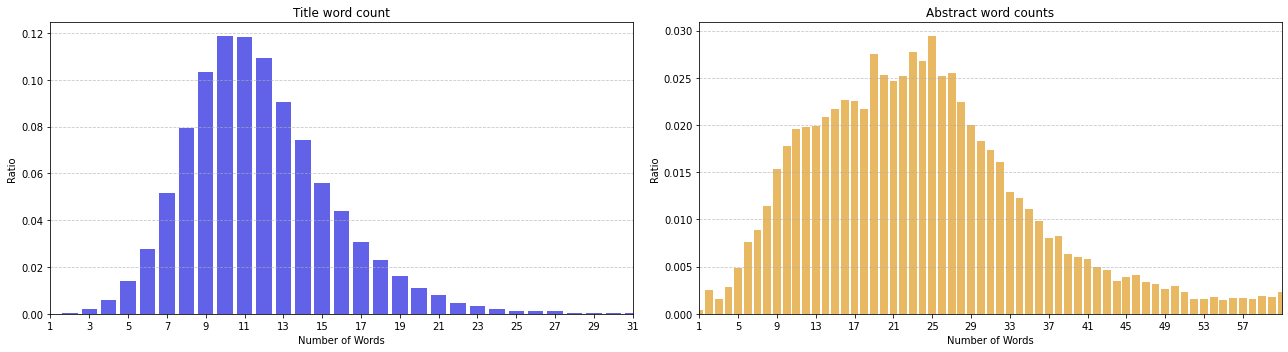

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot for 'text_column'
sns.barplot(x=normalized_counts.index, y=normalized_counts, color='blue', alpha=0.7, ax=axes[0])
axes[0].set_title('Title word count')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Ratio')
axes[0].set_xlim(0, 30)
axes[0].set_xticks(range(0, 31, 2))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for 'abstract_column'
sns.barplot(x=normalized_counts_abstract.index, y=normalized_counts_abstract, color='orange', alpha=0.7, ax=axes[1])
axes[1].set_title('Abstract word counts')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Ratio')
axes[1].set_xlim(0, 60)
axes[1].set_xticks(range(0, 60, 4))
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [46]:
category_counts = news["SubCategory"].unique()
len(news)

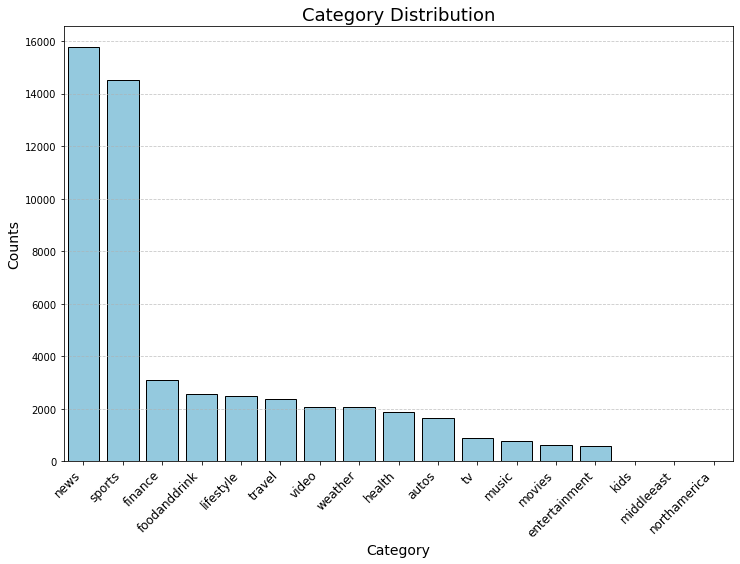

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, color='skyblue', edgecolor='black')
plt.title('Category Distribution', fontsize=18)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
subcategory_counts = news["SubCategory"].value_counts()
subcategory_counts.sort_values(ascending=False, inplace=True)

subcategory_counts_top = subcategory_counts[:10]

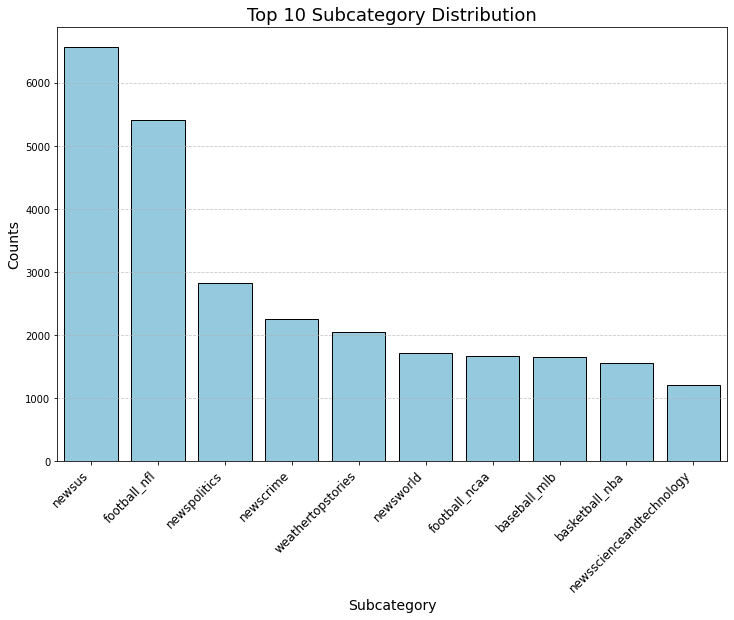

In [22]:
# Plot the the top 10 subcategories
plt.figure(figsize=(12, 8))
sns.barplot(x=subcategory_counts_top.index, y=subcategory_counts_top.values, color='skyblue', edgecolor='black')
plt.title('Top 10 Subcategory Distribution', fontsize=18)
plt.xlabel('Subcategory', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [23]:
# count the number of subcategories in each category
subcategory_nums_per_category = news.groupby('Category')['SubCategory'].nunique().sort_values(ascending=False)

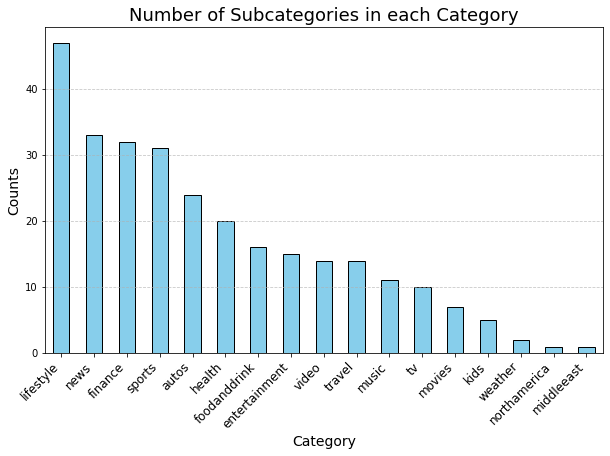

In [25]:
# Plot the number of subcategories in each category
plt.figure(figsize=(10, 6))
subcategory_nums_per_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Subcategories in each Category', fontsize=18)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [26]:
# I want to study how many users in train data appear in validation data

users_train = pd.read_csv('Sample data/train/behaviors.tsv',sep='\t',header=None, index_col=0)
users_val = pd.read_csv('Sample data/test/behaviors.tsv',sep='\t',header=None, index_col=0)


In [50]:
users_train[4].dropna().apply(lambda x: x.count('N')).mean() * 50000 + users_train[3].dropna().apply(lambda x: x.count('N')).mean() * 50000

3522653.7131486023

In [27]:
# Get the unique users in train data
unique_users_train = users_train[1].unique()
unique_users_val = users_val[1].unique()
print(len(unique_users_train), len(unique_users_val))

50000 50000


In [29]:
# get intersection of two sets
common_users = set(unique_users_train).intersection(unique_users_val)
all_user = set(unique_users_train).union(unique_users_val)
ratio = len(common_users) / len(all_user)
print(ratio)

0.06318508989229935


In [30]:
# how many news recommended to users in train data appear in validation data
unique_news_train = users_train[4].unique()
# split the news ids
unique_news_train = [news_id.split('-')[0] for news_id in unique_news_train]
unique_news_val = users_val[4].unique()
unique_news_val = [news_id.split('-')[0] for news_id in unique_news_val]

In [31]:
common_news = set(unique_news_train).intersection(unique_news_val)
ratio = len(common_news) / len(unique_news_val)
print(ratio)

0.009301093467159193
